In [36]:
%matplotlib notebook

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import datestr2num

In [49]:
# read raw data
check_df = pd.read_csv("Resources/nics-firearm-background-checks.csv")
check_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-03,Alabama,31205.0,606.0,34897.0,17850.0,1583.0,1744,0.0,36.0,...,0.0,0.0,0.0,42.0,23.0,8.0,2.0,2.0,0.0,92652
1,2020-03,Alaska,143.0,4.0,4657.0,3819.0,487.0,386,0.0,0.0,...,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,9939
2,2020-03,Arizona,5685.0,958.0,46377.0,19346.0,2433.0,4846,0.0,18.0,...,2.0,0.0,0.0,21.0,11.0,5.0,0.0,0.0,0.0,82771
3,2020-03,Arkansas,2424.0,673.0,15304.0,8968.0,600.0,885,4.0,27.0,...,0.0,0.0,0.0,11.0,10.0,3.0,1.0,0.0,2.0,31651
4,2020-03,California,27792.0,0.0,81543.0,48616.0,5041.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164497


In [335]:
# read raw data
background_check = pd.read_csv("Resources/nics-firearm-background-checks.csv")
background_check = background_check[['month', 'totals','handgun','long_gun']]
background_check.rename(columns={'month': 'date'}, inplace=True)

<IPython.core.display.Javascript object>


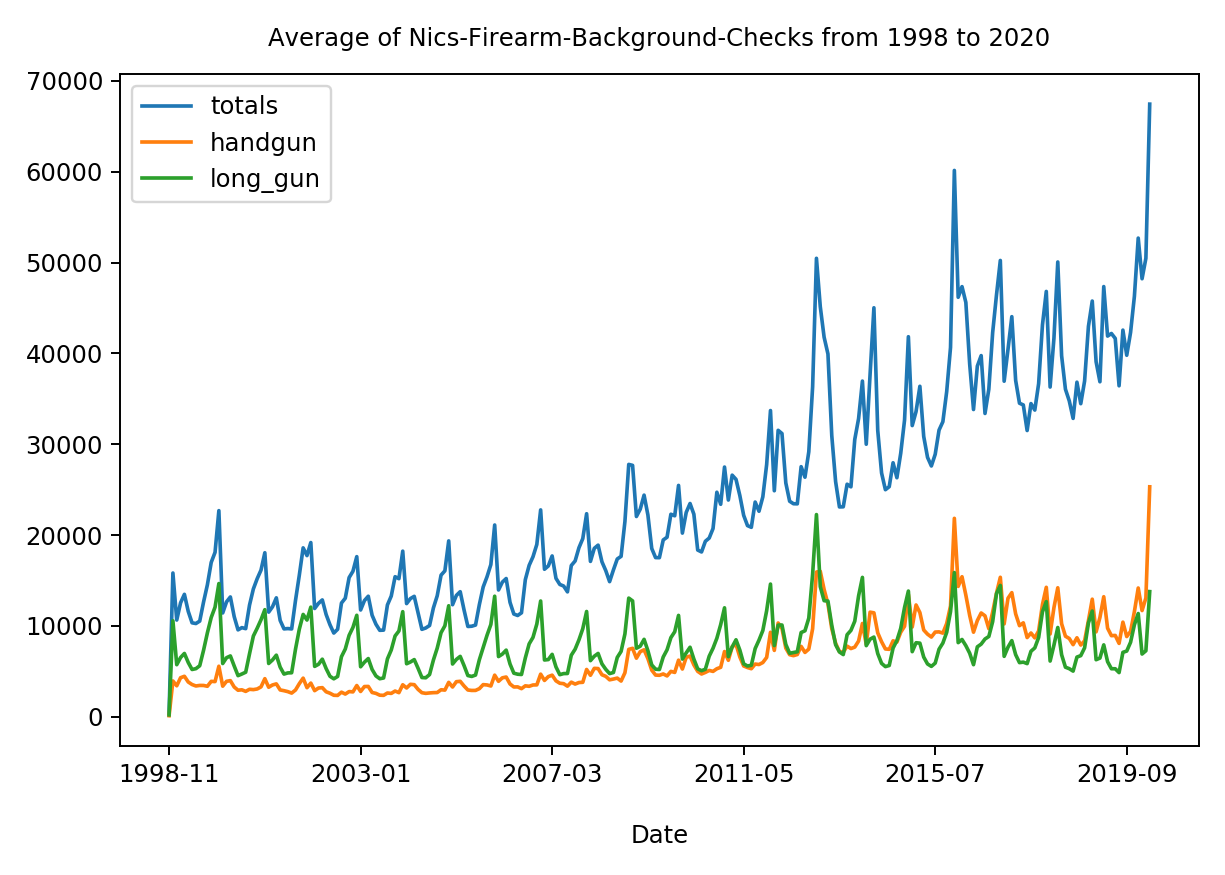

In [337]:
background_check_agg = background_check.groupby('date').mean()
background_check_agg = background_check_agg.plot(figsize=(7,5))
plt.xlabel("Date", labelpad=15)
plt.title("Average of Nics-Firearm-Background-Checks from 1998 to 2020", y=1.02, fontsize=10);
plt.tight_layout()

<IPython.core.display.Javascript object>


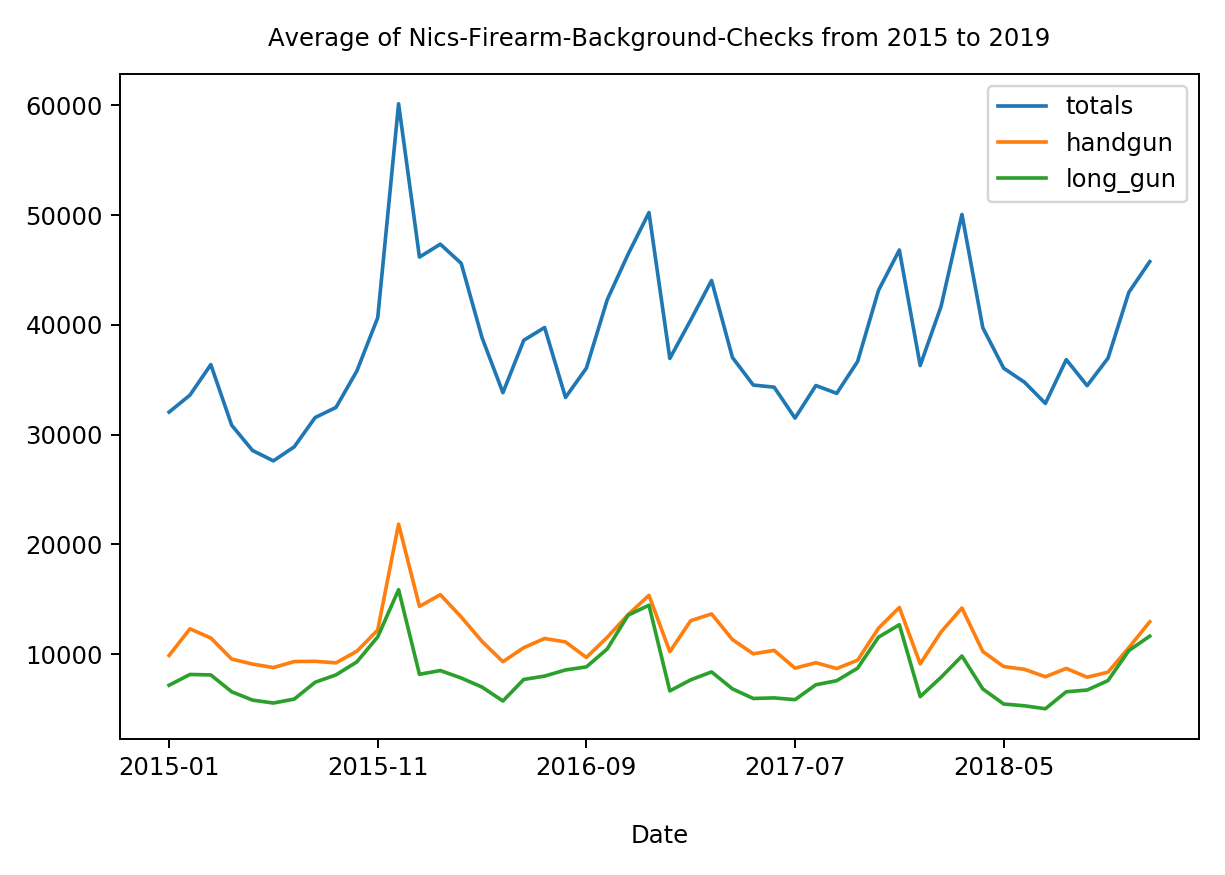

In [338]:
background_check_select = background_check[(background_check['date'] >= '2015') & (background_check['date'] <= '2019')]
background_check_select = background_check_select.groupby('date').mean()
background_check_select.plot(figsize = (7,5))
plt.xlabel("Date", labelpad=18)
plt.title("Average of Nics-Firearm-Background-Checks from 2015 to 2019", y=1.02, fontsize=10);
plt.tight_layout()

In [351]:
gun_violence = pd.read_csv("Resources/gun-violence-data_01-2013_03-2018.csv")
gun_violence['n_killed/injured'] = gun_violence.n_killed + gun_violence.n_injured
gun_violence['date'] = gun_violence['date'].apply(lambda x: x[: -2])

<IPython.core.display.Javascript object>


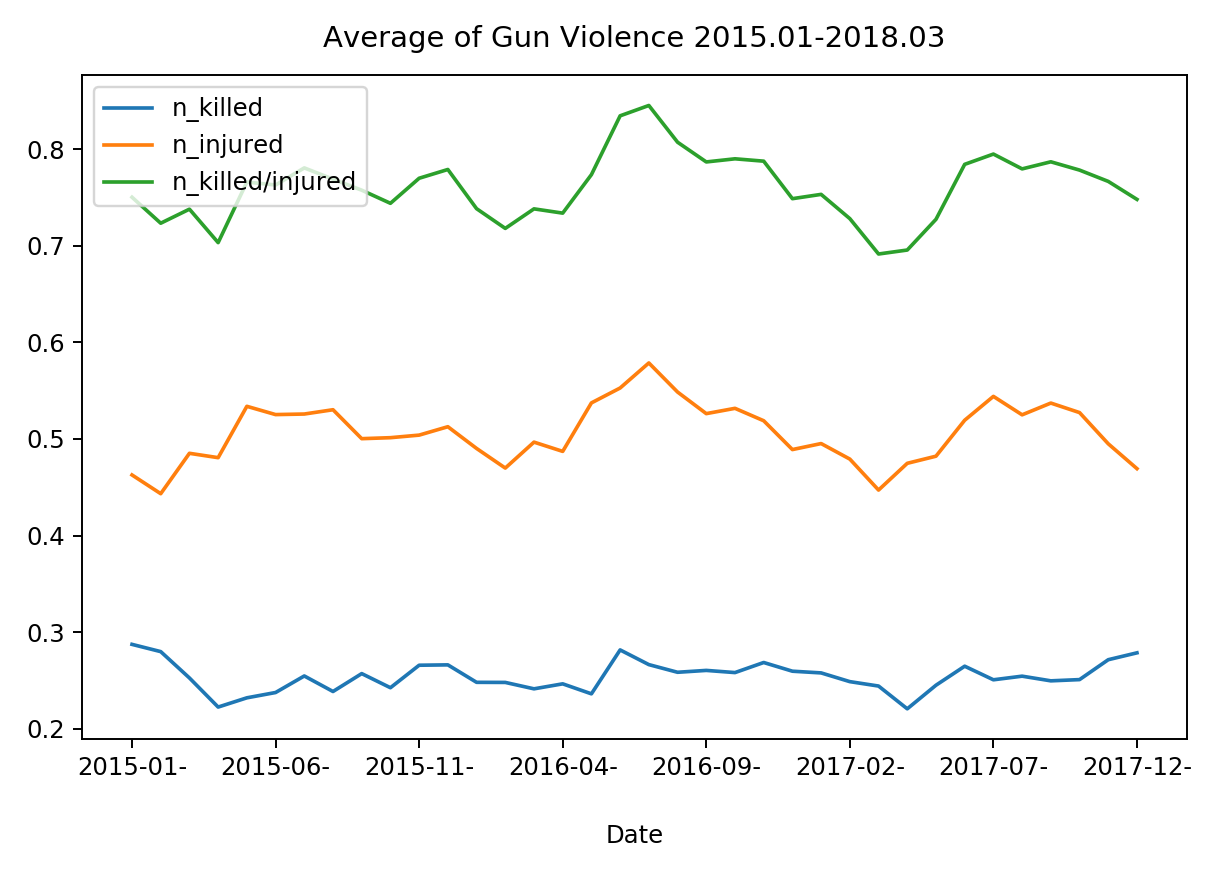

In [352]:
gun_violence = gun_violence[(gun_violence['date'] >= '2015') & (gun_violence['date'] <= '2018')]
gun_violence = gun_violence[['date','n_killed','n_injured','n_killed/injured']]
gun_violence = gun_violence.groupby('date').mean()
# gun_violence = gun_violence.reset_index()
# gun_violence
gun_violence.plot(figsize = (7,5))
plt.xlabel("Date", labelpad=18)
# plt.xticks(rotation = 45)
plt.title("Average of Gun Violence 2015.01-2018.03", y=1.02, fontsize=12);
plt.tight_layout()

<IPython.core.display.Javascript object>


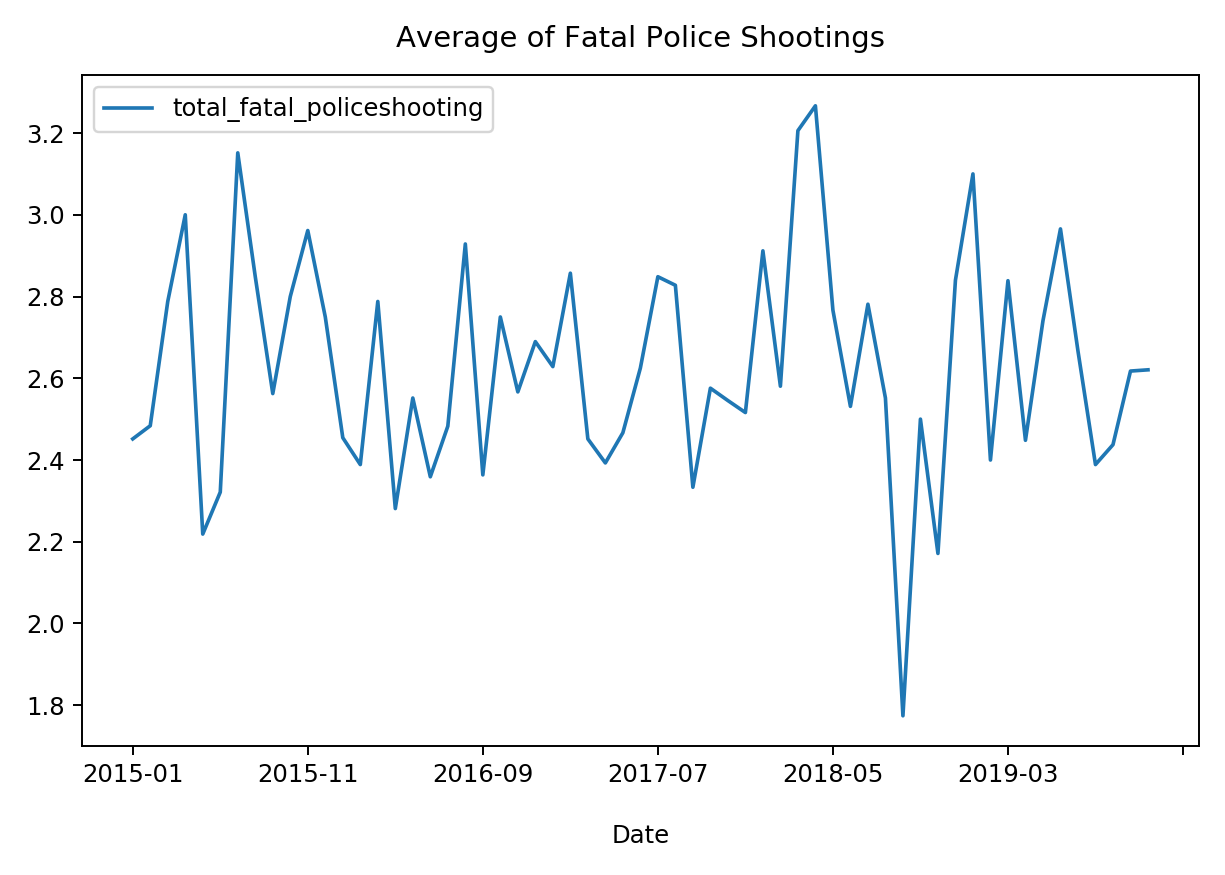

In [362]:
police_shooting = pd.read_csv("Resources/fatal-police-shootings-data.csv")
police_shooting = police_shooting[(police_shooting['date'] >= '2015') & (police_shooting['date'] <= '2020')]
police_shooting['date'] = police_shooting['date'].apply(lambda x: x[: -3]) 
police_shooting = police_shooting.groupby(['date','state']).count() 
police_shooting = police_shooting.reset_index()
police_shooting = police_shooting.groupby('date').mean()
police_shooting
police_shooting = police_shooting[['id']]
police_shooting = police_shooting.rename(columns={'id':'total_fatal_policeshooting'})
# drop the last row 
police_shooting = police_shooting[: -1]


police_shooting.plot(kind = "line",figsize = (7,5))

plt.xlabel("Date", labelpad=15)
plt.title("Average of Fatal Police Shootings", y=1.02, fontsize=12);
plt.tight_layout()

In [382]:
# background_check_select

In [384]:
# gun_violence 

In [385]:
# police_shooting

In [1]:
combined = background_check_select.join(gun_violence)
combined = combined.join(police_shooting)
combined

NameError: name 'background_check_select' is not defined